In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np 
import xarray as xr 
import yaml
from yaml import CLoader as Loader, CDumper as Dumper
from pathlib import Path
import os
import glob
import pandas as pd

import sys
sys.path.append("Y:\\Philip\\PyDDM\\PyDDM") #must point to the PyDDM folder
import ddm_analysis_and_fitting as ddm

import gc
import statistics

import scipy
from scipy.optimize import curve_fit

C:\Users\pneill\Anaconda3\lib\site-packages\xarray\backends\cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


In [192]:
loc = 'Y:\\Philip\\Nat\\0.5hae(2)\\'

aaa = '0min\\image(1)_0.5hae_ROI_0-256-0-256_ddmmatrix.nc'
bbb = 'yml_template'


ddm_fit = ddm.DDM_Fit(loc+bbb)

#ddm_fit.set_parameter_initial_guess('StretchingExp2',[0.1,1.5])

ddm_fit._load_data_from_file(loc+aaa)


my_fit = ddm_fit.fit(display_table=False)

ddm.fit_report(my_fit, forced_qs=[4,15], show=False)
my_fit.to_netcdf(loc+"_ISFFIT.nc")

,Initial guess,Minimum,Maximum
Amplitude,100.0,0.0001,1000000.0
Tau,1.0,0.0010,1000.0
Background,10000.0,0.0000,10000000.0
StretchingExp,1.0,0.1000,2.0


File Y:\\Philip\\Nat\\0.3hae\\image(43)_ddmmatrix.nc not found.
Loading file Y:\Philip\Nat\0.5hae(2)\0min\image(1)_0.5hae_ROI_0-256-0-256_ddmmatrix.nc ...
In function 'get_tau_vs_q_fit', using new tau...
Fit is saved in fittings dictionary with key 'fit01'.
In function 'get_tau_vs_q_fit', using new tau...
In hf.plot_one_tau_vs_q function, using new tau... 


<xarray.Dataset>
Dimensions:          (parameter: 4, q: 64, lagtime: 40)
Coordinates:
  * parameter        (parameter) <U13 'Amplitude' 'Tau' ... 'StretchingExp'
  * q                (q) float64 0.0 0.4057 0.8114 1.217 ... 24.75 25.15 25.56
  * lagtime          (lagtime) float64 0.05 0.1 0.15 0.2 ... 11.95 13.4 15.0
Data variables:
    parameters       (parameter, q) float64 0.0001001 6.575e+03 ... 2.0 1.427
    theory           (lagtime, q) float64 6.41e-06 188.0 286.4 ... 51.8 52.13
    isf_data         (lagtime, q) float64 0.0 0.9977 0.9817 ... -68.65 -244.9
    ddm_matrix_data  (lagtime, q) float64 0.0 170.2 231.3 ... 52.42 52.59 52.33
    A                (q) float64 -54.86 5.026e+04 9.658e+03 ... -0.03257 -0.0103
    B                float64 54.86
Attributes: (12/18)
    model:                          DDM Matrix - Single Exponential
    data_to_use:                    DDM Matrix
    initial_params_dict:            ["{'n': 0, 'value': 100.0, 'limits': [0.0...
    effective_diffusion_coeff:      0.9498726044236849
    tau_vs_q_slope:                 [-1.6509629]
    msd_alpha:                      [1.21141426]
    ...                             ...
    DataDirectory:                  X:\Philip\Vedant\0.5hae_6mgml\0min\
    FileName:                       image(1).tif
    pixel_size:                     0.0605
    frame_rate:                     20
    BackgroundMethod:               0
    OverlapMethod:                  2

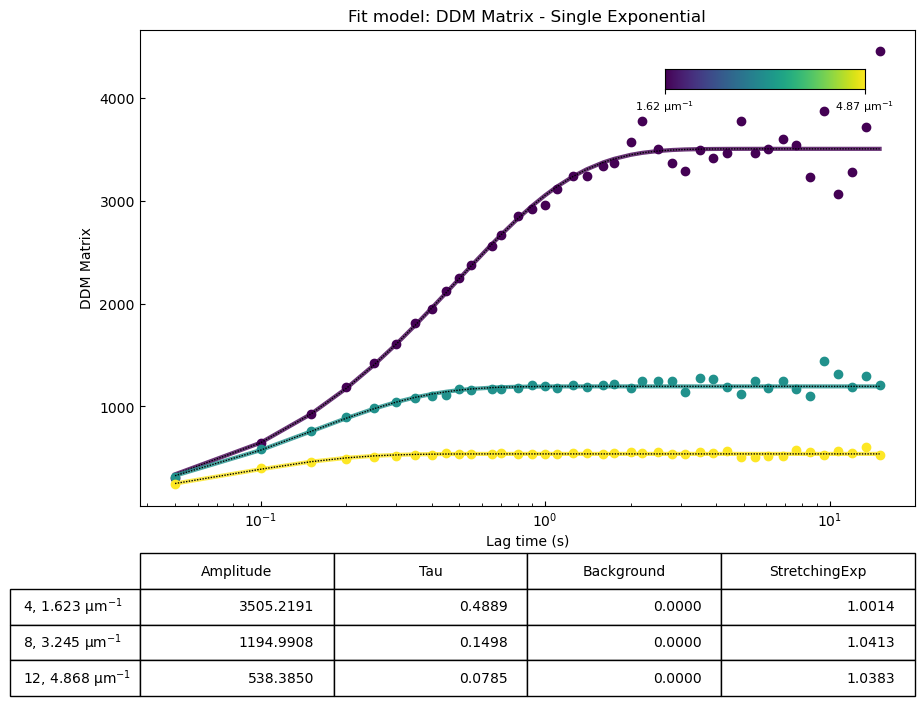

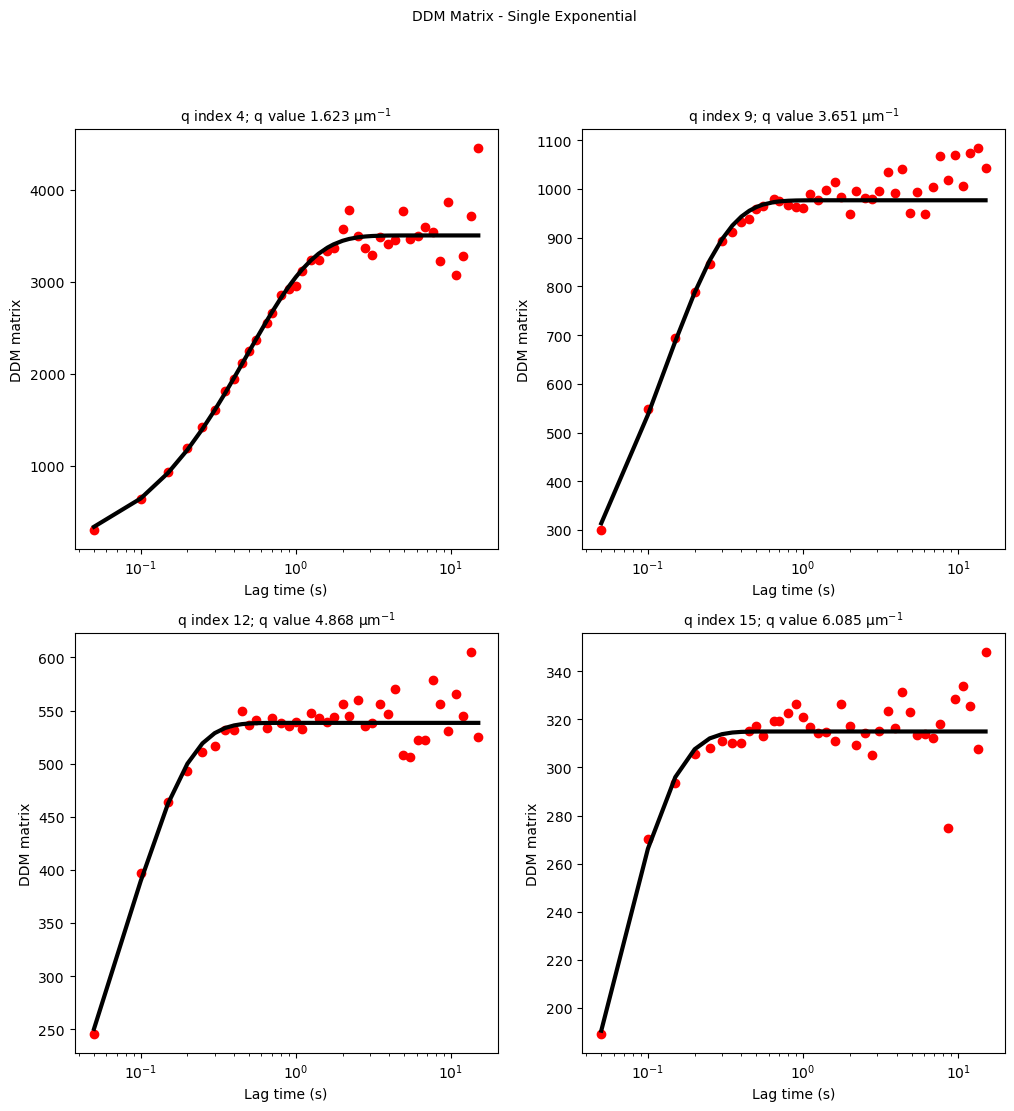

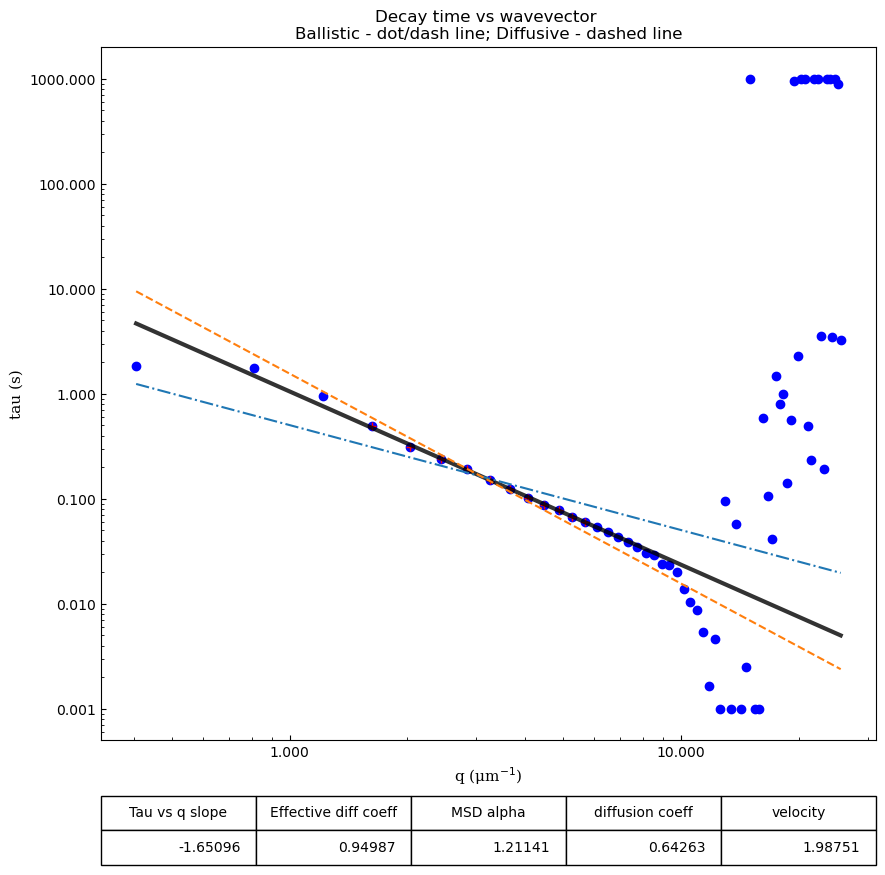

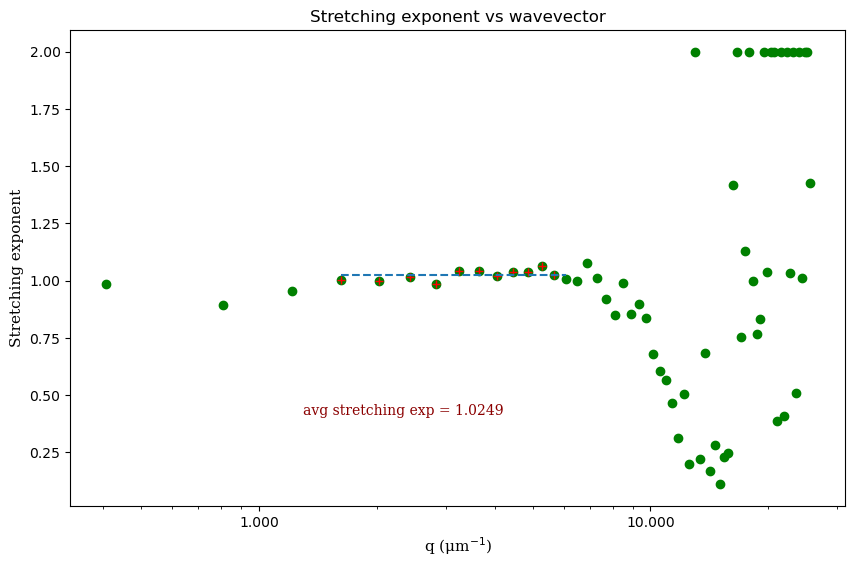

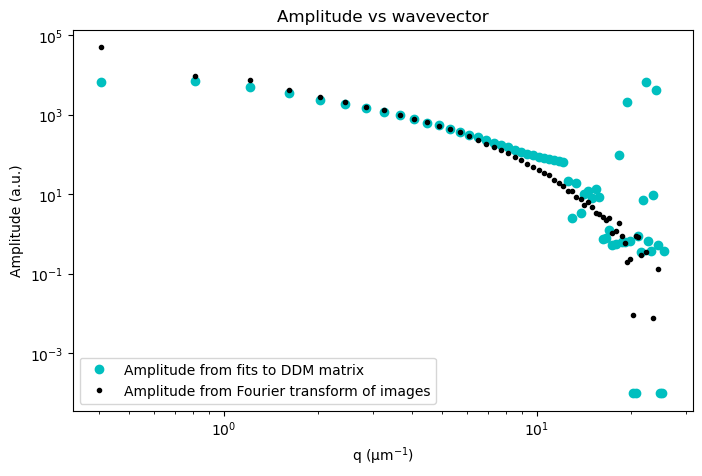

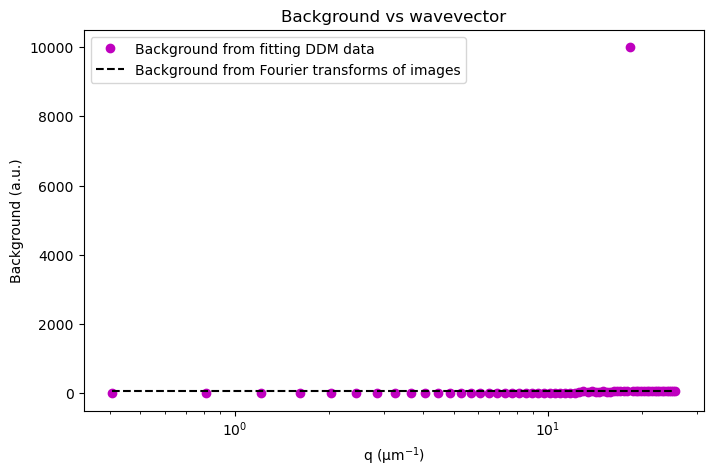

In [194]:
ddm.fit_report(my_fit, q_indices=[4,9,12,15], forced_qs=[4,15], use_new_tau=False, show=True)

In [185]:
ddm.print_fitting_models()

1: 'DDM Matrix - Single Exponential'
2: 'DDM Matrix - Double Exponential'
3: 'DDM Matrix - Exponential and Ballistic'
4: 'DDM Matrix - Ballistic'
5: 'DDM Matrix - Double Ballistic'
6: 'DDM Matrix - Single Exponential - NonErgodic'
7: 'DDM Matrix - Polydisperse'
8: 'ISF - Single Exponential'
9: 'ISF - Double Exponential'
10: 'ISF - Exponential and Ballistic'
11: 'ISF - Ballistic'
12: 'ISF - Double Ballistic'
13: 'ISF - Single Exponential - NonErgodic'
